## Predicting Formula 1 Race Outcomes and Evaluating Betting Performance

### Index

1. **Problem Definition**
2. **Data Collection and Preprocessing**
3. **Exploratory Data Analysis (EDA)**
4. **Feature Engineering**
5. **Modeling Approaches**
   - 5.1. Predicting the Race Winner (Classification)
   - 5.2. Predicting Race Positions (Regression)
   - 5.3. Predicting Race Positions (Multiclass Classification)
6. **Model Evaluation and Comparison**
7. **Betting Odds Analysis**
   - 7.1. Collecting Betting Odds
   - 7.2. Simulating Betting Outcomes
   - 7.3. Evaluating Profitability of Predictions
8. **Insights and Conclusions**
9. **Future Work**


### 1. Problem Definition
In this project, the primary goal is to leverage historical Formula 1 race data to predict two outcomes: the race winner and the final race positions. We aim to approach this problem with three distinct machine learning tasks:

- Predicting the Race Winner: We’ll treat this as a classification task, where the goal is to correctly predict the driver most likely to win the race.

- Predicting Race Outcomes/Positions: This part will be explored with two approaches:

    - Regression Task: Predicting the finishing position of each driver as a continuous value.
    - Multiclass Classification: Categorizing each driver into outcome groups (e.g., podium, top 5, etc.) to see if this approach yields better results.
- Betting Odds Analysis: After identifying the best-performing model, we’ll evaluate its effectiveness in a betting context. By simulating bets on the model’s predictions and comparing them to actual race outcomes, we can determine if our model could potentially “beat the odds” in a betting environment.

Through this approach, we aim to:

Analyze which modeling technique yields the best predictive performance for F1 race positions.
Understand whether the model’s insights could translate into profitable betting decisions, thus assessing the model's practical value in real-world applications.

### 2. Data Collection and Preprocessing
For this project, we’ll use the Formula 1 World Championship dataset on Kaggle, which contains multiple CSV files with data on races, drivers, constructors, results, and more.

**Dataset Overview:** CSV files available in the dataset: [Formula 1 World Championship 1950-2024](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)

- **circuits.csv**: Circuit details, including location and other attributes.
- **constructor_results.csv**: Results specific to each constructor, including points earned and other metrics.
- **constructor_standings.csv**: Standings for constructors across the championship seasons.
- **constructors.csv**: Constructor (team) information.
- **driver_standings.csv**: Standings for drivers throughout the seasons, reflecting performance across races.
- **drivers.csv**: Information about the drivers.
- **lap_times.csv**: Specific lap time data for drivers in various races.
- **pit_stops.csv**: Information on pit stops made during races.
- **qualifying.csv**: Data from qualifying sessions, indicating starting positions and times.
- **races.csv**: Details about each race, including dates, locations, and rounds.
- **results.csv**: Results of each race, including positions, points, and performance metrics.
- **sprint_results.csv**: Results from sprint races, if applicable, including positions and other metrics.
- **status.csv**: Codes indicating race status or outcome for drivers, such as 'Finished', 'Retired', etc.


In [19]:
import pandas as pd

circuits_df = pd.read_csv('data/circuits.csv')
constructor_results_df = pd.read_csv('data/constructor_results.csv')
constructor_standings_df = pd.read_csv('data/constructor_standings.csv')
constructors_df = pd.read_csv('data/constructors.csv')
driver_standings_df = pd.read_csv('data/driver_standings.csv')
drivers_df = pd.read_csv('data/drivers.csv')
lap_times_df = pd.read_csv('data/lap_times.csv')
pit_stops_df = pd.read_csv('data/pit_stops.csv')
qualifying_df = pd.read_csv('data/qualifying.csv')
races_df = pd.read_csv('data/races.csv')
results_df = pd.read_csv('data/results.csv')
sprint_results_df = pd.read_csv('data/sprint_results.csv')
status_df = pd.read_csv('data/status.csv')

In [20]:
print(circuits_df.head())
print(constructor_results_df.head())
print(constructor_standings_df.head())
print(constructors_df.head())
print(driver_standings_df.head())
print(drivers_df.head())
print(lap_times_df.head())
print(pit_stops_df.head())
print(qualifying_df.head())
print(races_df.head())
print(results_df.head())
print(sprint_results_df.head())
print(status_df.head())

   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.w

In [21]:
print("Variable types in circuits_df:\n", circuits_df.dtypes)
print("\nVariable types in constructor_results_df:\n", constructor_results_df.dtypes)
print("\nVariable types in constructor_standings_df:\n", constructor_standings_df.dtypes)
print("\nVariable types in constructors_df:\n", constructors_df.dtypes)
print("\nVariable types in driver_standings_df:\n", driver_standings_df.dtypes)
print("\nVariable types in drivers_df:\n", drivers_df.dtypes)
print("\nVariable types in lap_times_df:\n", lap_times_df.dtypes)
print("\nVariable types in pit_stops_df:\n", pit_stops_df.dtypes)
print("\nVariable types in qualifying_df:\n", qualifying_df.dtypes)
print("\nVariable types in races_df:\n", races_df.dtypes)
print("\nVariable types in results_df:\n", results_df.dtypes)
print("\nVariable types in sprint_results_df:\n", sprint_results_df.dtypes)
print("\nVariable types in status_df:\n", status_df.dtypes)

Variable types in circuits_df:
 circuitId       int64
circuitRef     object
name           object
location       object
country        object
lat           float64
lng           float64
alt             int64
url            object
dtype: object

Variable types in constructor_results_df:
 constructorResultsId      int64
raceId                    int64
constructorId             int64
points                  float64
status                   object
dtype: object

Variable types in constructor_standings_df:
 constructorStandingsId      int64
raceId                      int64
constructorId               int64
points                    float64
position                    int64
positionText               object
wins                        int64
dtype: object

Variable types in constructors_df:
 constructorId      int64
constructorRef    object
name              object
nationality       object
url               object
dtype: object

Variable types in driver_standings_df:
 driverStandingsId      

Key Observations
Datasets and Sizes:

Small datasets: circuits, constructors, drivers, status.
Medium datasets: constructor_results, constructor_standings, races, results, qualifying, sprint_results.
Large datasets: lap_times, pit_stops.
Columns with IDs:

raceId, driverId, constructorId are central identifiers linking multiple datasets.
Missing Data:

qualifying has missing values in q2 and q3.
races has placeholders like \N in session times.

Common Relationships:

races connects with circuits (via circuitId), results and qualifying (via raceId).
drivers and constructors connect with results (via driverId, constructorId).
lap_times and pit_stops detail race events (via raceId, driverId).

In [22]:
df1 = pd.merge(races_df,results_df,how='inner',on=['raceId'])
df2 = pd.merge(df1,qualifying_df,how='inner',on=['raceId','driverId','constructorId'])
df3 = pd.merge(df2,drivers_df,how='inner',on=['driverId'])
df4 = pd.merge(df3,constructors_df,how='inner',on=['constructorId'])
df5 = pd.merge(df4,circuits_df,how='inner',on=['circuitId'])
df6 = pd.merge(df5, driver_standings_df, how='inner', on=['raceId', 'driverId'])
df7 = pd.merge(df6, constructor_standings_df, how='inner', on=['raceId', 'constructorId'])


C:\Users\joelc\AppData\Local\Temp\ipykernel_1248\2827564745.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  df5 = pd.merge(df4,circuits_df,how='inner',on=['circuitId'])
C:\Users\joelc\AppData\Local\Temp\ipykernel_1248\2827564745.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'position_x'} in the result is deprecated and will raise a MergeError in a future version.
  df7 = pd.merge(df6, constructor_standings_df, how='inner', on=['raceId', 'constructorId'])


In [6]:

"""# 1. Merge circuits with races
races_with_circuits = pd.merge(races_df, circuits_df, on='circuitId', how='inner')

# 2. Merge results with drivers
results_with_drivers = pd.merge(results_df, drivers_df, on='driverId', how='inner')

# 3. Merge results with constructors
results_with_drivers_constructors = pd.merge(results_with_drivers, constructors_df, on='constructorId', how='inner')

# 4. Merge the extended results with races (already merged with circuits)
results_with_races = pd.merge(results_with_drivers_constructors, races_with_circuits, on='raceId', how='inner')

# 5. Add constructor standings
results_with_constructor_standings = pd.merge(results_with_races, constructor_standings_df, 
                                              on=['raceId', 'constructorId'], how='left')

# 6. Add driver standings
results_with_driver_standings = pd.merge(results_with_constructor_standings, driver_standings_df, 
                                         on=['raceId', 'driverId'], how='left')

# 7. Add qualifying information
final_dataset = pd.merge(results_with_driver_standings, qualifying_df, 
                         on=['raceId', 'driverId', 'constructorId'], how='left')

# Check and save the final dataset
print(final_dataset.info())
print(final_dataset.head())
"""

"# 1. Merge circuits with races\nraces_with_circuits = pd.merge(races_df, circuits_df, on='circuitId', how='inner')\n\n# 2. Merge results with drivers\nresults_with_drivers = pd.merge(results_df, drivers_df, on='driverId', how='inner')\n\n# 3. Merge results with constructors\nresults_with_drivers_constructors = pd.merge(results_with_drivers, constructors_df, on='constructorId', how='inner')\n\n# 4. Merge the extended results with races (already merged with circuits)\nresults_with_races = pd.merge(results_with_drivers_constructors, races_with_circuits, on='raceId', how='inner')\n\n# 5. Add constructor standings\nresults_with_constructor_standings = pd.merge(results_with_races, constructor_standings_df, \n                                              on=['raceId', 'constructorId'], how='left')\n\n# 6. Add driver standings\nresults_with_driver_standings = pd.merge(results_with_constructor_standings, driver_standings_df, \n                                         on=['raceId', 'driverId'],

In [7]:
df7.head()

,raceId,year,round,circuitId,name_x,date,time_x,url_x,resultId,driverId,...,driverStandingsId,points_y,position_x,positionText_y,wins_x,constructorStandingsId,points,position_y,positionText,wins_y
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,7554,18,...,8247,10.0,1,1,1,4038,18.0,1,1,1
1,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,7555,22,...,8248,8.0,2,2,0,4038,18.0,1,1,1
2,36,2007,1,1,Australian Grand Prix,2007-03-18,03:00:00,http://en.wikipedia.org/wiki/2007_Australian_G...,383,18,...,13627,0.0,15,15,0,25739,0.0,6,6,0
3,36,2007,1,1,Australian Grand Prix,2007-03-18,03:00:00,http://en.wikipedia.org/wiki/2007_Australian_G...,379,22,...,13623,0.0,11,11,0,25739,0.0,6,6,0
4,55,2006,3,1,Australian Grand Prix,2006-04-02,14:00:00,http://en.wikipedia.org/wiki/2006_Australian_G...,796,18,...,12849,11.0,5,5,0,6342,13.0,4,4,0


In [8]:
df7.info()
df7.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8121 entries, 0 to 8120
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   raceId                  8121 non-null   int64  
 1   year                    8121 non-null   int64  
 2   round                   8121 non-null   int64  
 3   circuitId               8121 non-null   int64  
 4   name_x                  8121 non-null   object 
 5   date                    8121 non-null   object 
 6   time_x                  8121 non-null   object 
 7   url_x                   8121 non-null   object 
 8   resultId                8121 non-null   int64  
 9   driverId                8121 non-null   int64  
 10  constructorId           8121 non-null   int64  
 11  number_x                8121 non-null   object 
 12  grid                    8121 non-null   int64  
 13  position_x              8121 non-null   object 
 14  positionText_x          8121 non-null   

Index(['raceId', 'year', 'round', 'circuitId', 'name_x', 'date', 'time_x',
       'url_x', 'resultId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position_x', 'positionText_x', 'positionOrder', 'points_x', 'laps',
       'time_y', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'qualifyId', 'number_y', 'position_y',
       'q1', 'q2', 'q3', 'driverRef', 'number', 'code', 'forename', 'surname',
       'dob', 'nationality_x', 'url_y', 'constructorRef', 'name_y',
       'nationality_y', 'url_x', 'circuitRef', 'name', 'location', 'country',
       'lat', 'lng', 'alt', 'url_y', 'driverStandingsId', 'points_y',
       'position_x', 'positionText_y', 'wins_x', 'constructorStandingsId',
       'points', 'position_y', 'positionText', 'wins_y'],
      dtype='object')

In [9]:
#drop the columns which are not important
data = df5.drop(['circuitId','time_x','url_x','resultId','driverId',
                 'constructorId','number_x','positionText','position_x',
                 'positionOrder','laps','time_y','rank',
                 'fastestLapTime','fastestLapSpeed','qualifyId','driverRef','number','code','url_y','circuitRef',
                 'location','lat','lng','alt','number_y','constructorRef','name_x','raceId','fastestLap','q2','q3','milliseconds','q1'],1)

C:\Users\joelc\AppData\Local\Temp\ipykernel_1248\3368087121.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = df5.drop(['circuitId','time_x','url_x','resultId','driverId',


In [10]:
data.head()

,year,round,date,grid,points,statusId,position_y,forename,surname,dob,nationality_x,name_y,nationality_y,name,country
0,2009,1,2009-03-29,1,10.0,1,1,Jenson,Button,1980-01-19,British,Brawn,British,Albert Park Grand Prix Circuit,Australia
1,2009,1,2009-03-29,2,8.0,1,2,Rubens,Barrichello,1972-05-23,Brazilian,Brawn,British,Albert Park Grand Prix Circuit,Australia
2,2008,1,2008-03-16,12,0.0,4,13,Jenson,Button,1980-01-19,British,Honda,Japanese,Albert Park Grand Prix Circuit,Australia
3,2007,1,2007-03-18,14,0.0,11,14,Jenson,Button,1980-01-19,British,Honda,Japanese,Albert Park Grand Prix Circuit,Australia
4,2006,3,2006-04-02,1,0.0,11,1,Jenson,Button,1980-01-19,British,Honda,Japanese,Albert Park Grand Prix Circuit,Australia


In [11]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['year', 'round', 'date', 'grid', 'points', 'statusId', 'position_y',
       'forename', 'surname', 'dob', 'nationality_x', 'name_y',
       'nationality_y', 'name', 'country'],
      dtype='object')
(8364, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8364 entries, 0 to 8363
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8364 non-null   int64  
 1   round          8364 non-null   int64  
 2   date           8364 non-null   object 
 3   grid           8364 non-null   int64  
 4   points         8364 non-null   float64
 5   statusId       8364 non-null   int64  
 6   position_y     8364 non-null   int64  
 7   forename       8364 non-null   object 
 8   surname        8364 non-null   object 
 9   dob            8364 non-null   object 
 10  nationality_x  8364 non-null   object 
 11  name_y         8364 non-null   object 
 12  nationality_y  8364 non-null   object 
 13  name       

In [12]:
#rename the columns
data.rename(columns={'name':'GP_name','position_y':'position','grid':'quali_pos','name_y':'constructor','nationality_x':'driver_nationality','nationality_y':'constructor_nationality'},inplace=True)
data['driver'] = data['forename']+' '+data['surname']
data['date'] = pd.to_datetime(data['date'])
data['dob'] = pd.to_datetime(data['dob'])

In [15]:
data.columns

Index(['year', 'round', 'date', 'quali_pos', 'points', 'statusId', 'position',
       'dob', 'driver_nationality', 'constructor', 'constructor_nationality',
       'GP_name', 'country', 'driver'],
      dtype='object')

In [14]:
data.drop(['forename','surname'],1,inplace=True)

C:\Users\joelc\AppData\Local\Temp\ipykernel_1248\3180610386.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['forename','surname'],1,inplace=True)


In [81]:
data.head()

,year,round,date,quali_pos,points,statusId,position,dob,driver_nationality,constructor,constructor_nationality,GP_name,country,driver
0,2009,1,2009-03-29,1,10.0,1,1,1980-01-19,British,Brawn,British,Albert Park Grand Prix Circuit,Australia,Jenson Button
1,2009,1,2009-03-29,2,8.0,1,2,1972-05-23,Brazilian,Brawn,British,Albert Park Grand Prix Circuit,Australia,Rubens Barrichello
2,2008,1,2008-03-16,12,0.0,4,13,1980-01-19,British,Honda,Japanese,Albert Park Grand Prix Circuit,Australia,Jenson Button
3,2007,1,2007-03-18,14,0.0,11,14,1980-01-19,British,Honda,Japanese,Albert Park Grand Prix Circuit,Australia,Jenson Button
4,2006,3,2006-04-02,1,0.0,11,1,1980-01-19,British,Honda,Japanese,Albert Park Grand Prix Circuit,Australia,Jenson Button


In [16]:
# Save to a CSV file for easier future access
data.to_csv('cleaned_dataset_v1.csv', index=False)

In [ ]:
from datetime import datetime

# Create a new column for driver age based on `dob` and `date`
data['date'] = pd.to_datetime(data['date'])
data['dob'] = pd.to_datetime(data['dob'])
data['driver_age'] = (data['date'] - data['dob']).dt.days // 365

# Create a binary column for DNF status
data['DNF'] = data['statusId'].apply(lambda x: 1 if x != 1 else 0)

# Create a binary target variable for predicting the winner
data['winner'] = data['position'].apply(lambda x: 1 if x == 1 else 0)

# Prepare features for initial modeling (baseline)
features = ['quali_pos', 'points', 'driver_age', 'DNF', ]
X = data[features]
y_classification = data['winner']  # Binary target
y_regression = data['position']  # Continuous target

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Train a baseline Logistic Regression model for binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error
clf = LogisticRegression(random_state=42, max_iter=500)
clf.fit(X_train, y_train_class)
y_pred_class = clf.predict(X_test)

# Train a baseline Linear Regression model for regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)

# Evaluate the models
classification_report_output = classification_report(y_test_class, y_pred_class)
mse_regression = mean_squared_error(y_test_reg, y_pred_reg)

classification_report_output, mse_regression


KeyError: "['constructor_points', 'constructor_wins', 'grid', 'laps', 'fastestLapRank', 'fastestLapSpeed'] not in index"

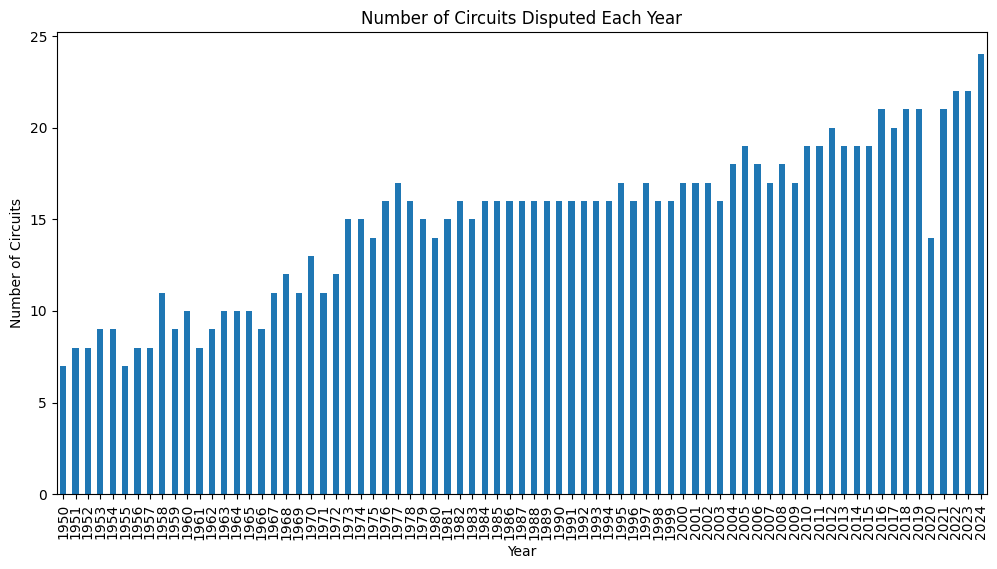

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and count the number of unique circuits
circuits_per_year = races_df.groupby('year')['circuitId'].nunique()

# Plot the results
plt.figure(figsize=(12, 6))
circuits_per_year.plot(kind='bar')
plt.title('Number of Circuits Disputed Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Circuits')
plt.show()

In [28]:
import matplotlib.pyplot as plt

def plot_wins_driver(results_df, threshold=1):
    # Your existing data manipulation steps
    winners = results_df[results_df['positionOrder'] == 1].merge(races_df, on='raceId')
    wins_per_driver = winners.groupby(['driverId', 'year']).size().unstack(fill_value=0)

    # Calculate total wins per driver
    total_wins_per_driver = wins_per_driver.sum(axis=1)

    # Merge with drivers_df to get surnames
    total_wins_per_driver = total_wins_per_driver.reset_index().merge(drivers_df[['driverId', 'surname']], on='driverId')

    # Filter out drivers with 0 wins
    total_wins_per_driver = total_wins_per_driver[total_wins_per_driver[0] > threshold]

    # Plot the results
    plt.figure(figsize=(15, 6))  # Increase figure size for better spacing
    ax = total_wins_per_driver.set_index('surname')[0].sort_values(ascending=False).plot(kind='bar', color='blue')

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right
    plt.title('Total Wins Per Driver')
    plt.xlabel('Driver Surname')
    plt.ylabel('Number of Wins')
    plt.grid(axis='y')

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()

    # Show the plot
    plt.show()

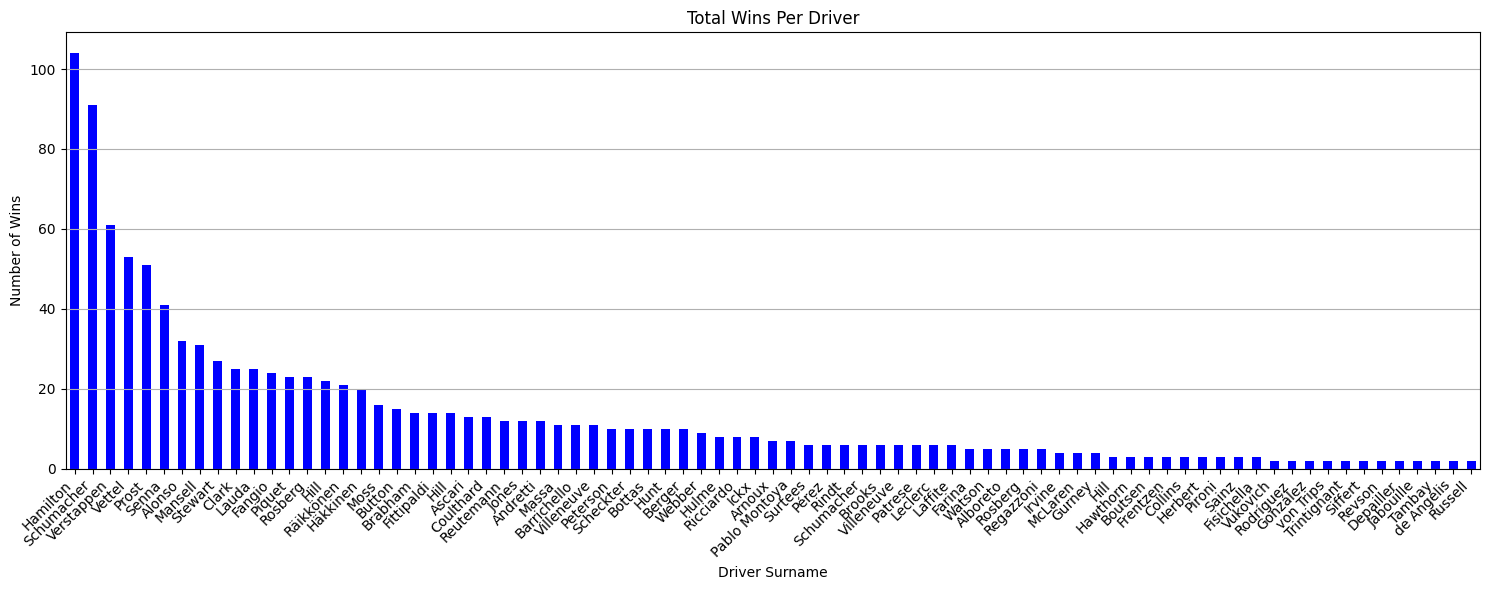

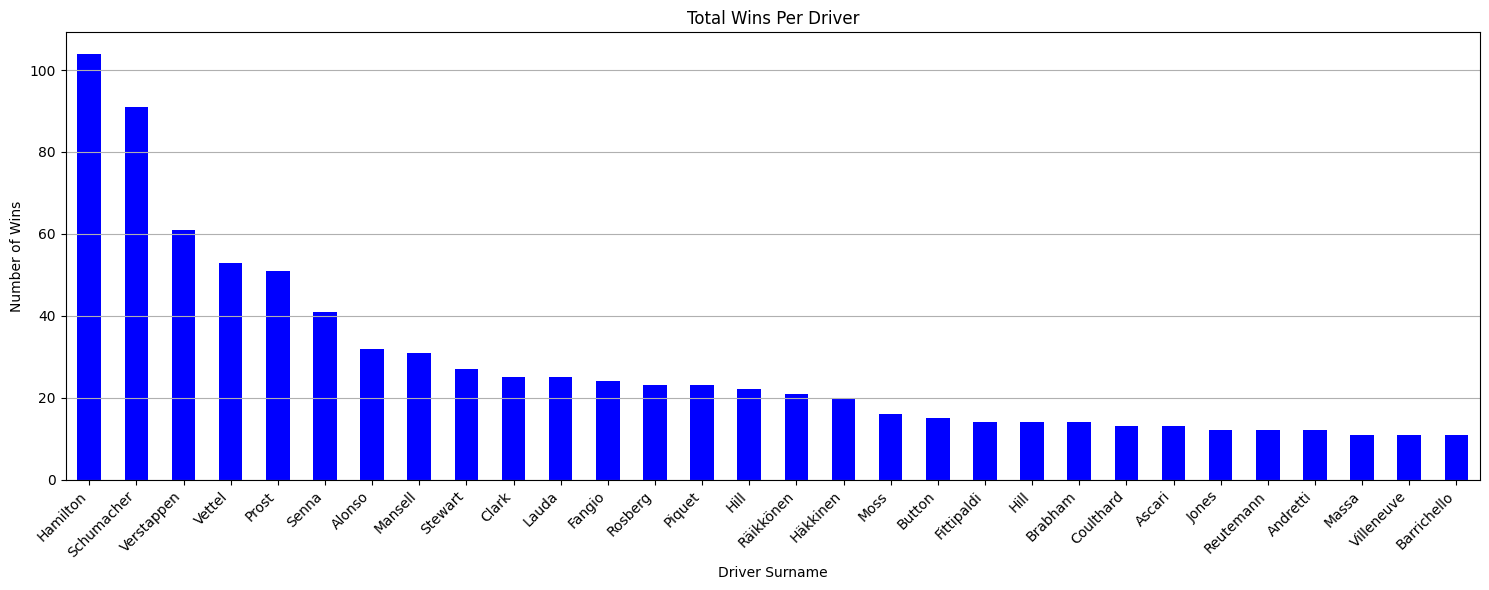

In [29]:
plot_wins_driver(results_df)
plot_wins_driver(results_df, threshold=10)

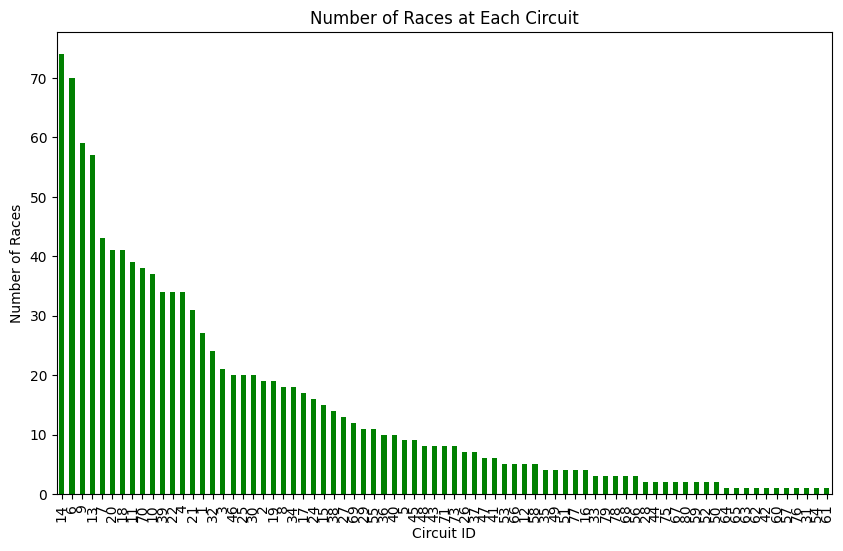

In [33]:
circuit_counts = races_df['circuitId'].value_counts()
plt.figure(figsize=(10, 6))
circuit_counts.plot(kind='bar', color='green')
plt.title('Number of Races at Each Circuit')
plt.xlabel('Circuit ID')
plt.ylabel('Number of Races')
plt.show()

In [47]:
constructors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   212 non-null    int64 
 1   constructorRef  212 non-null    object
 2   name            212 non-null    object
 3   nationality     212 non-null    object
 4   url             212 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [52]:
# Calculate the number of races each constructor participated in
constructor_counts = (
    constructor_results_df["constructorId"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "constructorId", "constructorId": "race_count"})
)

# Merge with constructors to get team names and details
constructor_details = pd.merge(
    constructor_counts, constructors_df, on="constructorId", how="left"
)

# Identify teams that participated in F1 for 5 years or less
teams_5_years_or_less = constructor_details[constructor_details["race_count"] <= 5]

# Remove these teams from the constructors dataset
teams_to_remove = teams_5_years_or_less["constructorId"].unique()
filtered_constructors_df = constructors_df[~constructors_df["constructorId"].isin(teams_to_remove)]

# Save the filtered dataset to a new file if needed
filtered_constructors_df.to_csv("filtered_constructors.csv", index=False)

# Display the cleaned constructors dataset
filtered_constructors_df.head()


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [53]:
filtered_constructors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 211
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   153 non-null    int64 
 1   constructorRef  153 non-null    object
 2   name            153 non-null    object
 3   nationality     153 non-null    object
 4   url             153 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.2+ KB


In [57]:
# Find the 20 most popular circuits based on the number of races held
popular_circuits = (races_df["circuitId"].value_counts().head(20).index.tolist())

# Filter races for the most popular circuits
popular_races = races_df[races_df["circuitId"].isin(popular_circuits)]

# Merge races with results
race_results = pd.merge(results_df, popular_races[["raceId", "circuitId"]], on="raceId", how="inner")

# Identify pole position (grid=1) and race winners (positionOrder=1)
race_results["pole_position"] = race_results["grid"] == 1
race_results["won_race"] = race_results["position"] == 1




In [58]:
race_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,circuitId,pole_position,won_race
0,1,18,1,1,22,1,1,1,1,10.0,...,1:34:50.616,5690616,39,2,1:27.452,218.300,1,1,True,False
1,2,18,2,2,3,5,2,2,2,8.0,...,+5.478,5696094,41,3,1:27.739,217.586,1,1,False,False
2,3,18,3,3,7,7,3,3,3,6.0,...,+8.163,5698779,41,5,1:28.090,216.719,1,1,False,False
3,4,18,4,4,5,11,4,4,4,5.0,...,+17.181,5707797,58,7,1:28.603,215.464,1,1,False,False
4,5,18,5,1,23,3,5,5,5,4.0,...,+18.014,5708630,43,1,1:27.418,218.385,1,1,False,False


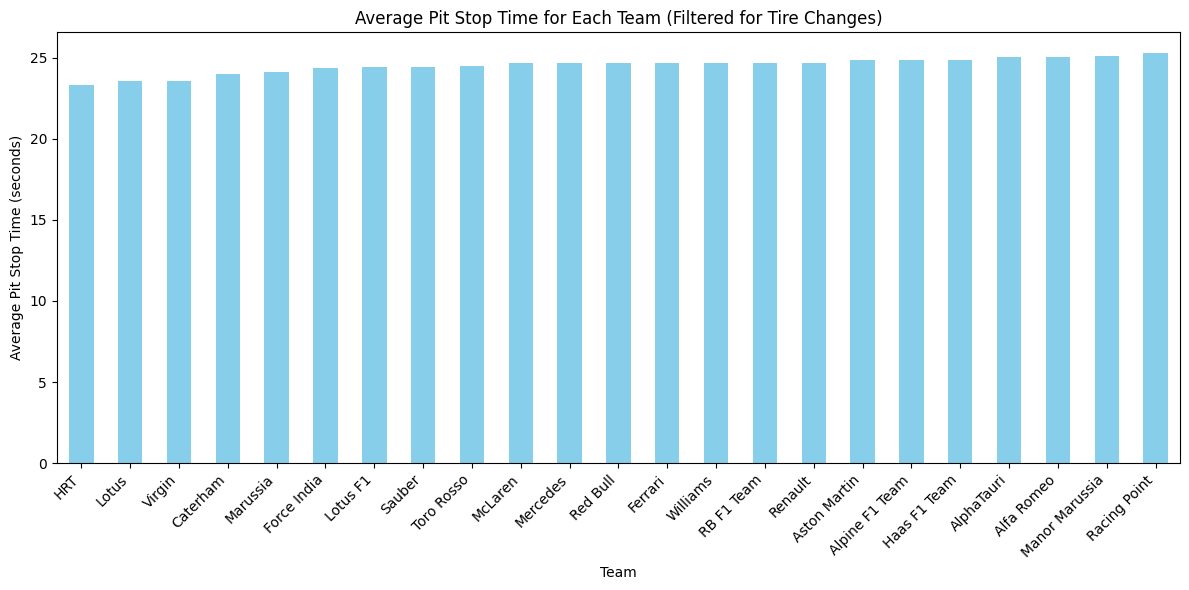

In [43]:
# Filter pit stops to include only those within the typical range for tire changes
filtered_pit_stops = pit_stops_df[
    (pit_stops_df["milliseconds"] <= 50000)
]

# Recalculate the average pit stop time per race
filtered_avg_pit_times = filtered_pit_stops.groupby("raceId")["milliseconds"].mean().reset_index()

# Merge filtered pit stops with constructor results using raceId
filtered_merged_avg_pit = pd.merge(
    filtered_avg_pit_times, constructor_results_df, on="raceId", how="inner"
)

# Merge with constructors to get team names
filtered_final_merged = pd.merge(
    filtered_merged_avg_pit, constructors_df[["constructorId", "name"]], on="constructorId", how="left"
)

# Calculate the average pit stop time per team
filtered_avg_pit_time_per_team = (
    filtered_final_merged.groupby("name")["milliseconds"].mean().sort_values()
)

# Plot the data
plt.figure(figsize=(12, 6))
(filtered_avg_pit_time_per_team/1000).plot(kind="bar", color="skyblue")
plt.title("Average Pit Stop Time for Each Team (Filtered for Tire Changes)")
plt.ylabel("Average Pit Stop Time (seconds)")
plt.xlabel("Team")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [46]:
constructor_results_df['constructorId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  21,  20,  22,  24,  25,  26,  27,
        29,  28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  40,  39,
        41,  42,  44,  45,  46,  47,  23,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58, 204,  59,  60,  62, 182,  63,  65,  67,
        68,  64,  70,  73,  72, 202,  66,  75,  76, 203,  80,  77,  79,
        81,  82, 180, 200, 201,  86, 187, 198, 191, 196, 167, 197, 189,
       194, 195, 190, 183, 170, 172, 176, 181, 192, 188,  93, 184, 186,
        94,  92,  95,  97,  98,  99, 175,  87, 100,  89, 101, 174, 102,
       103, 173, 117, 115, 109, 121, 105, 120, 119, 114, 104, 125, 169,
       124, 168, 113, 122, 123, 118, 116, 108, 110, 127,  90, 193,  91,
       185,  96, 179, 177, 178, 171, 106, 112, 111, 107,  85, 199,  83,
        84,  78,  74,  69,  71,  61, 131, 205, 164, 166, 208, 206, 207,
       209, 210, 211, 213, 214, 215], dtype=int64)

In [36]:
pit_stops_df['milliseconds'].describe()

count    1.099000e+04
mean     8.530431e+04
std      3.114894e+05
min      1.289700e+04
25%      2.195125e+04
50%      2.362900e+04
75%      2.650350e+04
max      3.069017e+06
Name: milliseconds, dtype: float64

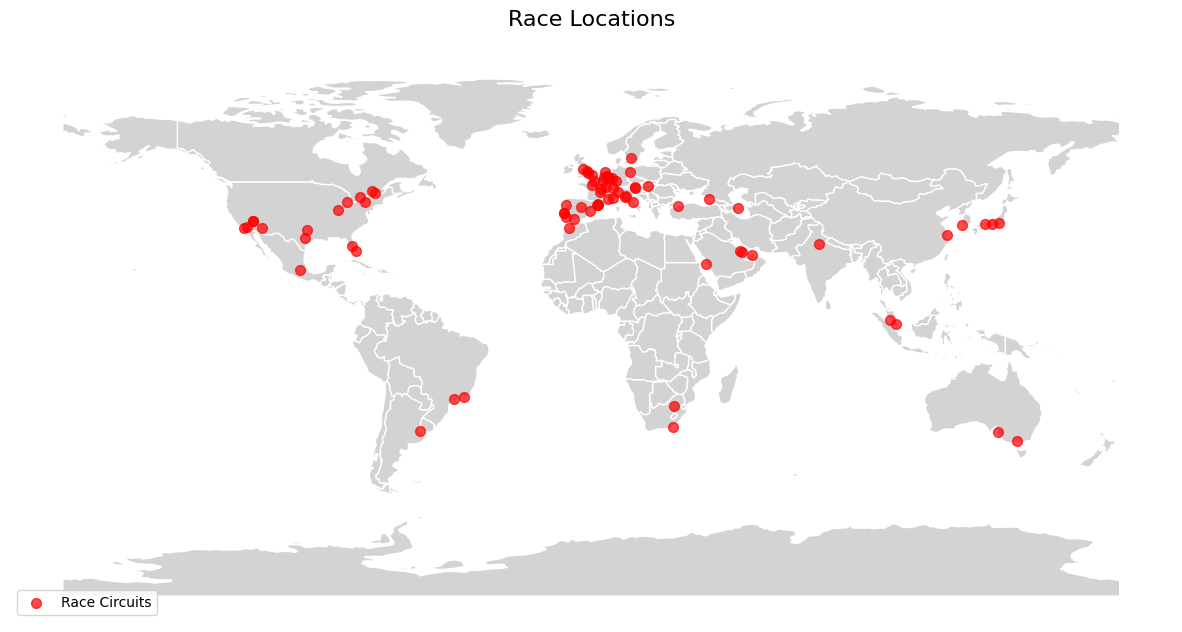

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import tempfile
import os

def plot_race_locations(circuits_df):
    """
    Create a world map visualization of race circuit locations
    
    Parameters:
    circuits_df: DataFrame containing 'lat' and 'lng' columns for circuit locations
    """
    # Create GeoDataFrame for circuits
    circuits_gdf = gpd.GeoDataFrame(
        circuits_df, 
        geometry=gpd.points_from_xy(circuits_df.lng, circuits_df.lat),
        crs='EPSG:4326'
    )
    
    # Download and load natural earth data
    url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
    
    # Create a temporary directory to store the downloaded file
    with tempfile.TemporaryDirectory() as tmpdir:
        # Download the zip file
        response = requests.get(url)
        zip_path = os.path.join(tmpdir, "ne_110m_admin_0_countries.zip")
        with open(zip_path, 'wb') as f:
            f.write(response.content)
        
        # Read the shapefile from the zip
        world = gpd.read_file(f"zip://{zip_path}")
        
        # Create the plot
        fig, ax = plt.subplots(figsize=(15, 10))
        
        # Plot the world map
        world.plot(ax=ax, color='lightgray', edgecolor='white')
        
        # Plot the circuit locations
        circuits_gdf.plot(
            ax=ax,
            color='red',
            markersize=50,
            alpha=0.7,
            label='Race Circuits'
        )
        
        # Customize the plot
        plt.title('Race Locations', fontsize=16, pad=20)
        plt.axis('off')  # Remove axes
        
        # Add legend
        plt.legend(loc='lower left')
        
        return fig

# Example usage:
fig = plot_race_locations(circuits_df)
plt.show()